# 6. Fourierova transformácia

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft
from skimage import data, transform as tf
from skimage.color import rgb2gray

plt.rc({'family' : 'normal', 'wight'  : 'normal', 'size' : 18})

Fourierova transformácia (FT) je dôležitým nástrojom pri úprave signálov, ktoré rozkladá na
jednotlivé harmonické zložky. Hovoríme o prechode z časovej (rsp. priestorovej) oblasti do
frekvenčnej oblasti. Pre lepšie pochopenie uvedieme najskôr príklad použitia FT na signále šíriacom
sa pozdĺž jedného rozmeru zloženom z dvoch harmonických zložiek:

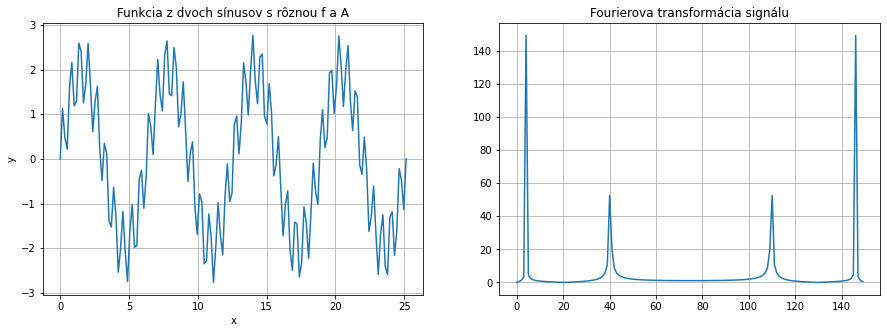

In [2]:
x = np.linspace(0, 8*np.pi, 150)
y_1 = 2*np.sin(x)
y_2 = 0.8*np.sin(10*x)
y = y_1 + y_2
y_f = fft.fft(y)

plt.figure(figsize= (15, 5))
plt.subplot(121)
plt.title('Funkcia z dvoch sínusov s rôznou f a A')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.plot(x, y)

plt.subplot(122)
plt.title('Fourierova transformácia signálu')
plt.grid()
plt.plot(np.abs(y_f));

Úpravou frekvenčného spektra pred vykonaním inverznej Fourierovej transformácie môžeme zo
signálu odfiltrovať niektoré harmonické zložky:

C:\Users\sirok\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


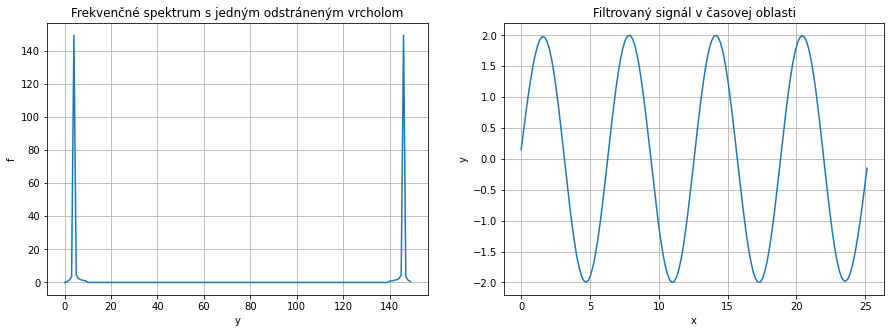

In [3]:
y_f_removed_f = y_f
y_f_removed_f[10:140] = 0 + 0.j

plt.figure(figsize= (15, 5))
plt.subplot(121)
plt.title('Frekvenčné spektrum s jedným odstráneným vrcholom')
plt.xlabel('y')
plt.ylabel('f')
plt.grid()
plt.plot(np.abs(y_f))

plt.subplot(122)
plt.title('Filtrovaný signál v časovej oblasti')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
y_t = fft.ifft(y_f)
plt.plot(x, y_t);

Zatiaľ sme s pôvodným signálom narábali, ako s bezrozmerným. Ak poznáme vzorkovaciu
frekvenciu môžeme odčítať frekvencie jednotlivých zložiek v Hertzoch.

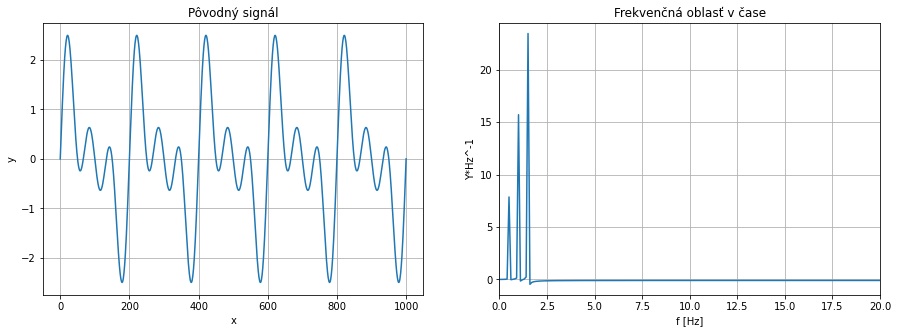

In [4]:
N = 1000
Fs  = 100 # Hz vzorkovacia frekvencia
T = N/Fs

x = np.linspace(0, 10*np.pi, N)
y_1 = np.sin(x) + np.sin(2*x) + np.sin(3*x)
f = np.linspace(0, N - 1, N)*Fs / N

plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.title('Pôvodný signál')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
y_f = fft.fft(y_1)
plt.plot(y_1)

plt.subplot(122)
plt.title('Frekvenčná oblasť v čase')
plt.xlabel('f [Hz]')
plt.ylabel('Y*Hz^-1')
plt.grid()
plt.plot(f, np.real(y_f))
plt.axis([0, 20, np.min(np.real(y_f)) - 1, np.max(np.real(y_f)) + 1]);

Obrázky tiež predstavujú signál. Šíri sa však pozdĺž dvoch rozmerov. Teraz si s využitím vektora _y_
skonštruujeme demonštračný obrázok. Najskôr prvky vektora y prevedieme do rozsahu <0, 255> a
replikujeme *y* tak aby sme získali maticu. Výsledkom bude obrázok, v ktorom sa signál šíri v
horizontálnej rovine a akoby sme sa naň pozerali „zhora“:

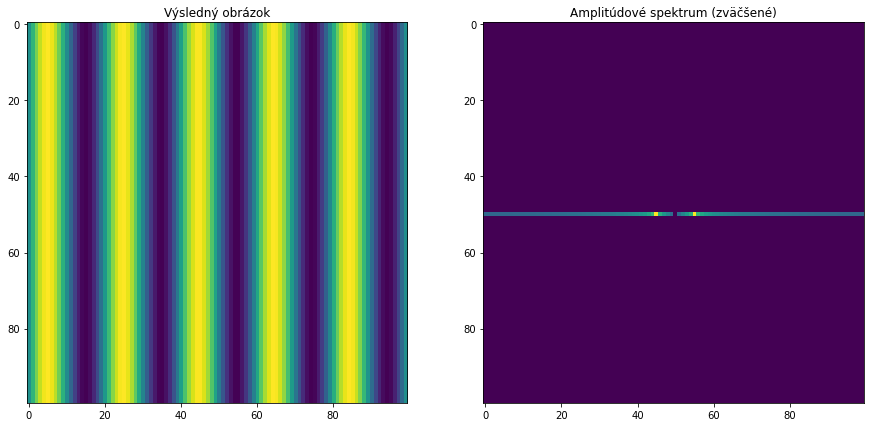

In [5]:
N=100
x = np.array([np.linspace(0, 10*np.pi, N)])
y = np.sin(x)
im = np.repeat(y, 100, axis= 0)

plt.figure(figsize= (15, 10))
plt.subplot(121)
plt.title('Výsledný obrázok')
plt.imshow(im)

plt.subplot(122)
plt.title('Amplitúdové spektrum (zväčšené)')
im_fft= fft.fft2(im)
zero_center_im_fft = fft.fftshift(im_fft)
plt.imshow(np.log(1+np.abs(zero_center_im_fft)));

Tento príklad naznačuje, že filtrovanie vo frekvenčnej oblasti bude veľmi efektívne pri
odstraňovaní periodického šumu, ako napr. rušenia 50Hz signálu elektrickej siete.
Poznáme mnoho druhov filtrov, pričom nemusíme zložky signálov úplne vylúčiť ale ich len
potlačíme. Samotná voľba filtra je obvykle závislá na úlohe a prevedená experimentátorom,
ktorý opakovane aplikuje rôzne filtre a posudzuje výsledok. Niekedy je však možné urobiť
automatické filtrovanie s využitím inteligentných metód.

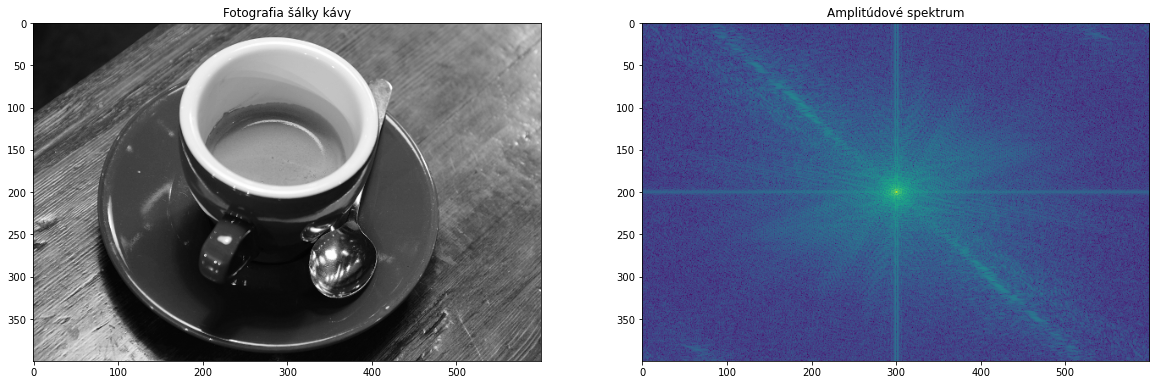

In [6]:
img = rgb2gray(data.coffee())
plt.figure(figsize= (20, 15))
plt.subplot(121)
plt.title('Fotografia šálky kávy')
plt.imshow(img, cmap= 'gray')

plt.subplot(122)
plt.title('Amplitúdové spektrum')
img_fft= fft.fft2(img)
zero_center_img_fft = fft.fftshift(img_fft)
plt.imshow(np.log(1 + np.abs(zero_center_img_fft)));

Vidíme, že frekvenčné spektrum je tentokrát oveľa zložitejšie. V nasledujúcom príklade sa
pokúsime potlačiť zobrazenie určitých periodických frekvencií s použitím jednoduchého
dolnopriepustného filtra. Nízke frekvencie definujú pomaly sa meniace črty obvykle definujúce
celkové tvary objektov. Šum, hrany a detaily zodpovedajú vyšším frekvenciám.

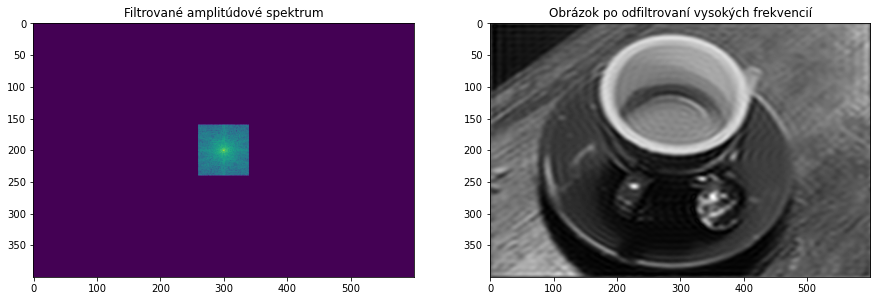

In [7]:
pixels = 40
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.title('Filtrované amplitúdové spektrum')
img_fft= fft.fft2(img)
zero_center_img_fft = fft.fftshift(img_fft)
img_size = img.shape
filt_spect = np.zeros(zero_center_img_fft.shape, dtype= np.complex)

filt_spect[img_size[0] // 2 - pixels:img_size[0] // 2 + pixels, img_size[1] // 2 - pixels:img_size[1] // 2 + pixels] = \
    zero_center_img_fft[img_size[0] // 2 - pixels:img_size[0] // 2 + pixels , img_size[1] // 2 - pixels:img_size[1] // 2 + pixels]

plt.imshow(np.log(1 + np.abs(filt_spect)))

plt.subplot(122)
plt.title('Obrázok po odfiltrovaní vysokých frekvencií')
inverseImg = fft.ifft2(filt_spect)
plt.imshow(np.abs(inverseImg), cmap= 'gray');

Môžeme pozorovať, že výsledok je podobný spriemerovaniu. Spolu so šumom bola potlačená aj
textúra objektov, ale došlo tiež k nežiadúcemu rozostreniu hrán. Výsledok je možné optimalizovať
použitím cielenejšieho filtrovania. Vzhľadom na to, že vzorka sa šíri vo vertikálnom a horizontálnom
smere, bolo by vhodné redukovať len tieto zložky spektra. Teraz skúsime opačný prístup a použijeme
zjednodušený hornopriepustný filter:

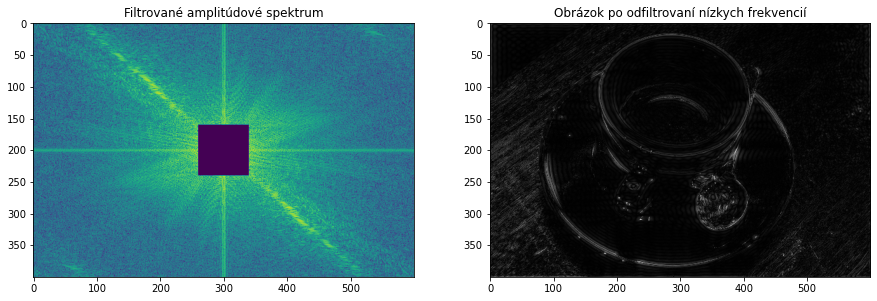

In [8]:
pixels = 40
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.title('Filtrované amplitúdové spektrum')
img_fft = fft.fft2(img)
zero_center_img_fft = fft.fftshift(img_fft)
img_size = img.shape
filt_spect = zero_center_img_fft

filt_spect[img_size[0] // 2 - pixels:img_size[0] // 2 + pixels, img_size[1] // 2 - pixels:img_size[1] // 2 + pixels] = 0 + 0.j
plt.imshow(np.log(1 + np.abs(filt_spect)))

plt.subplot(122)
plt.title('Obrázok po odfiltrovaní nízkych frekvencií')
inverse_img = fft.ifft2(filt_spect)
plt.imshow(np.abs(inverse_img), cmap= 'gray');

Tentokrát boli v obrázku ponechané črty zodpovedajúce vyšším harmonickým zložkám. Kľúčovou
vlastnosťou Fourierovej transformácie je, že násobenie dvoch transformovaných funkcií
zodpovedá ich konvolúcii v priestorovej oblasti. V kombinácii s rýchlou FT (Fast Fourier
Transform, FFT) je táto vlastnosť základom algoritmov rýchlej konvolúcie. Na demonštráciu
použijeme príklad vyhľadávania vzoru v obrázku z kapitoly Konvolúcia. Načítajme zdrojový
obrázok a vyberme vzor:

<ipython-input-9-3942caed6701>:1: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  txt = (rgb2gray(plt.imread("./imgs/txt.png")) * 255).astype(dtype= np.uint8)


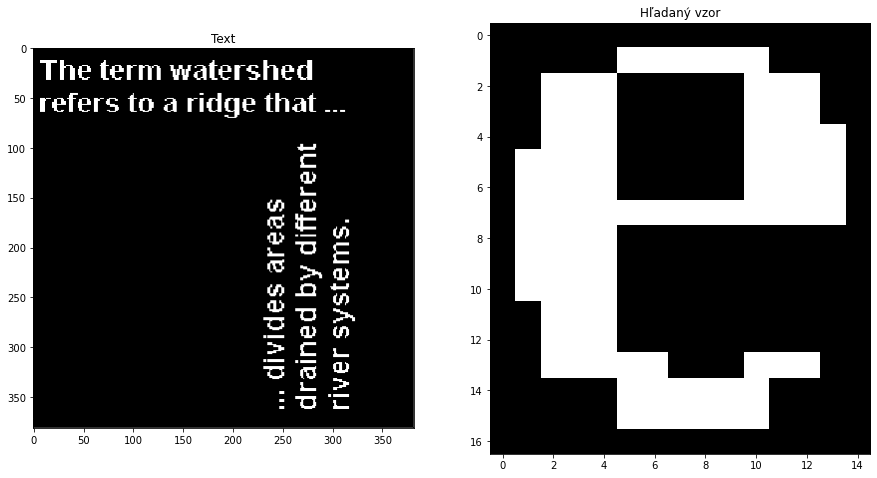

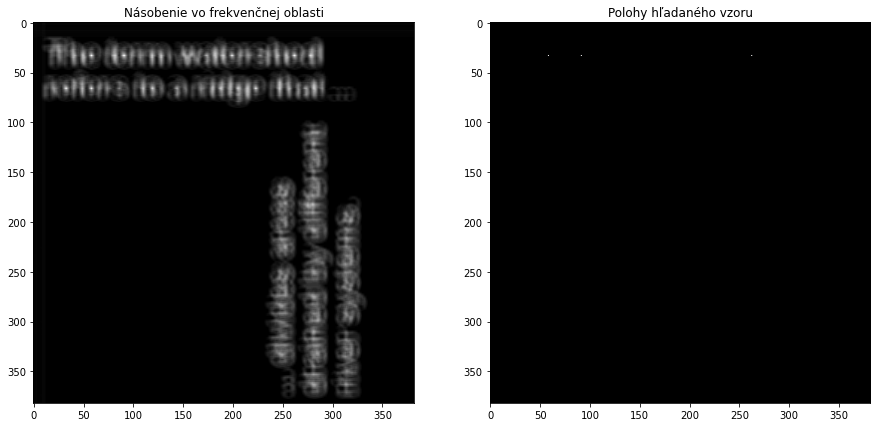

In [9]:
txt = (rgb2gray(plt.imread("./imgs/txt.png")) * 255).astype(dtype= np.uint8)

plt.figure(figsize= (15, 10))
plt.subplot(121)
plt.title('Text')
plt.imshow(txt, cmap= 'gray')

plt.subplot(122)
plt.title('Hľadaný vzor')
kernel = tf.rotate(txt[17:34, 44:59], 180)
plt.imshow(tf.rotate(kernel, 180), cmap= 'gray')

plt.figure(figsize= (15, 10))
plt.subplot(121)
plt.title('Násobenie vo frekvenčnej oblasti')
txt_size = txt.shape
real_txt = np.real(np.fft.ifft2(np.fft.fft2(txt) * np.fft.fft2(kernel, txt_size)))
plt.imshow(real_txt, cmap= 'gray')

plt.subplot(122)
plt.title('Polohy hľadaného vzoru')
thresh_real_txt = real_txt > 0.95 * np.max(real_txt)
plt.imshow(thresh_real_txt, cmap= 'gray');

Analýzou frekvenčného spektra môžeme určiť dominantné smery šírenia signálu v obrázku. Túto
informáciu môžeme využiť napr. pri určovaní orientácie objektov alebo písaného textu, rsp. pri
registrácii obrázkov. Demonštrovať to budeme na obrázku žeriavu. Použijeme filtráciu frekvenčného
spektra prahovaním. Vylúčime z neho všetky zložky, ktorých amplitúda je nižšia, ako 65% maxima.
Po tejto operácií sú zrejmé 3 prevažujúce smery šírenia signálu v obrázku.

<ipython-input-10-a6aff5ed0f50>:28: RuntimeWarning: invalid value encountered in sqrt
  if np.sqrt(np.sum(np.power((i - s1 / 2), 2) - np.power((j - s2 / 2), 2)))< rad:


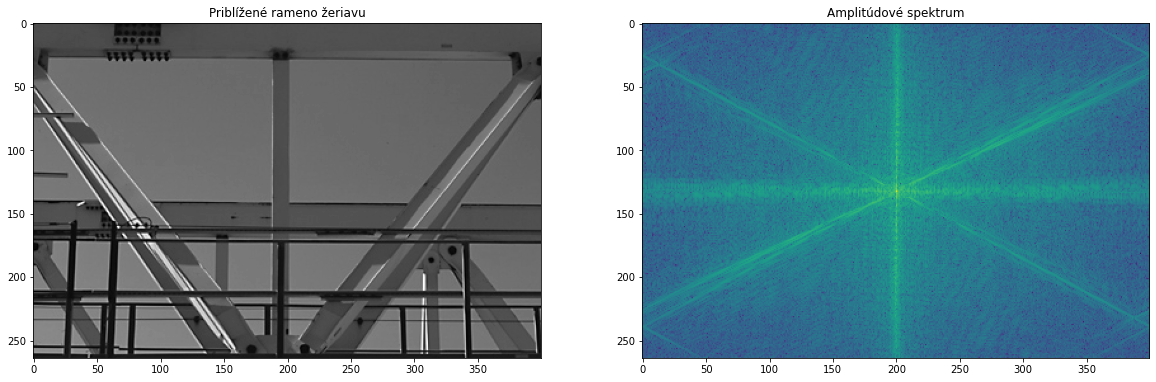

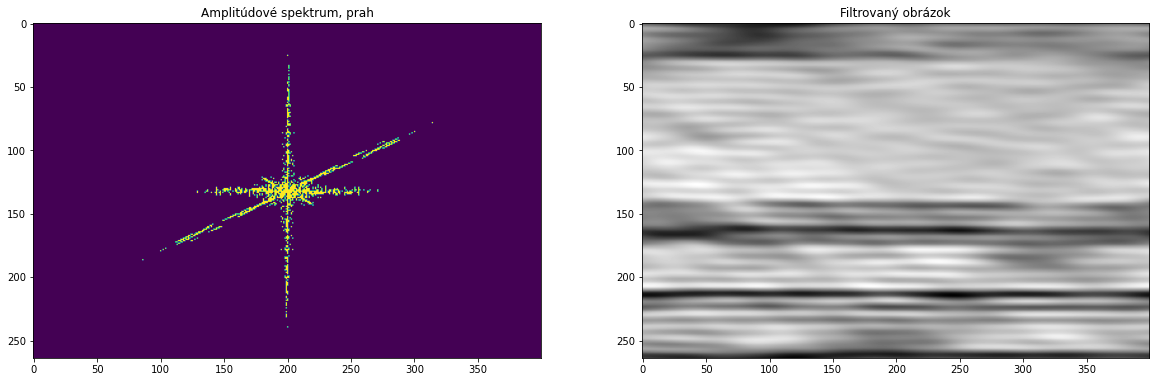

In [10]:
crane = (rgb2gray(plt.imread("./imgs/gantrycrane.png")) * 255).astype(dtype= np.uint8)
plt.figure(figsize= (20, 15))
plt.subplot(121)
plt.title('Priblížené rameno žeriavu')
plt.imshow(crane, cmap= 'gray')

plt.subplot(122)
plt.title('Amplitúdové spektrum')
crane_fft = np.fft.fft2(crane)
zct_crane_fft = np.fft.fftshift(crane_fft)
plt.imshow(np.log(1 + np.abs(zct_crane_fft)))

plt.figure(figsize= (20, 15))
plt.subplot(121)
plt.title('Amplitúdové spektrum, prah')
thresh = np.log(np.abs(zct_crane_fft)) > (0.65 * np.max(np.max(np.log(np.abs(zct_crane_fft)))))
plt.imshow(thresh)

plt.subplot(122)
plt.title('Filtrovaný obrázok')
circ_filter = np.zeros(crane_fft.shape)
rad = 30
s1 = circ_filter.shape[0]
s2 = circ_filter.shape[1]

for i in range(0, s1, 1):
    for j in range(0, s2, 1):
        if np.sqrt(np.sum(np.power((i - s1 / 2), 2) - np.power((j - s2 / 2), 2)))< rad:
            circ_filter[i, j] = 1

F3 = zct_crane_fft * thresh * circ_filter
Y = np.fft.ifft2(np.fft.ifftshift(F3))
plt.imshow(np.real(Y), cmap= 'gray');

## Úloha
Vytvorte screenshot obrazovky, na ktorej je ľubovoľný text. Orežte obrázok tak aby obsahoval
iba text. Tento pootočte a na pootočenom obrázku sa pokúste analýzou frekvenčného spektra
určiť smer textu. Výsledok porovnajte s hodnotou, ktorú ste použili na pootočenie.